<h1>Dataset

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
data = pd.read_csv('data/training_c.csv')
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25.0,130,80.0,72.0,98,86.0,high risk
1,35.0,140,90.0,72.0,98,70.0,high risk
2,29.0,90,70.0,72.0,100,80.0,high risk
3,30.0,140,85.0,72.0,98,70.0,high risk
4,35.0,120,60.0,61.0,98,76.0,low risk
...,...,...,...,...,...,...,...
1004,48.0,120,80.0,72.0,98,88.0,high risk
1005,22.0,120,60.0,72.0,98,80.0,high risk
1006,55.0,120,90.0,72.0,98,60.0,high risk
1007,35.0,85,60.0,72.0,98,86.0,high risk


Importiamo i classificatori progettati manualmente nello step 1 (le funzioni sono state definite sul file functions.py)

In [43]:
import script_py.functions as functions

In questo step utilizziamo scikit learn solo per standardizzare i dati e dividere il dataset in training set e test set

In [44]:

# Divisione in training e test
X = data.drop("RiskLevel", axis=1)  # Separa le colonne contenenti le feature (escludendo "RiskLevel")
y = data['RiskLevel']  # Estrai la colonna target ("RiskLevel")


# Codifica le etichette in numeri
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Codifica le etichette in numeri

# Utilizzo di train_test_split per suddividere il dataset in training (80%) e test (20%)
# 'stratify=y' assicura che la distribuzione delle classi nel target sia mantenuta nei due set
# 'random_state=42' rende la divisione riproducibile
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standardizzazione dei dati
scaler = StandardScaler()  # Crea un oggetto per la standardizzazione
X_train = scaler.fit_transform(X_train)  # Calcola la media e la deviazione standard su X_train, poi applica la trasformazione
X_test = scaler.transform(X_test)  # Utilizza i parametri di X_train (media e deviazione) per standardizzare X_test

Quindi abbiamo il Training set (X_train, y_train) che è utilizzato per addestrare il modello. Il Test set (X_test, y_test) è utilizzato per valutare le prestazioni del modello.


y_pred contiene le predizioni sul set di test fatte dal classificatore.
Invece y_train contiene le etichette del set di training.

<h1> KNN

Utilizziamo adesso il nostro classificatore KNN implementato nello step 1

In [45]:
# Trova il miglior valore di k usando cross-validation
k_values = list(range(1, 11))  # Prova k da 1 a 10
best_k = functions.find_best_k(X_train, y_train, k_values, num_folds=5)  # Cross-validation a 5 fold

# Predizione di y_test con il miglior valore di k
y_pred = functions.knn_predict(X_train, y_train, X_test, best_k)
# Calcolo e stampa dell'accuratezza finale
final_accuracy = np.mean(y_pred == y_test)
print(f'Accuratezza finale sui dati di test (con k={best_k}): {final_accuracy:.4f}')

Accuracy for k=1: 0.7839
Accuracy for k=2: 0.7839
Accuracy for k=3: 0.6969
Accuracy for k=4: 0.7019
Accuracy for k=5: 0.7019
Accuracy for k=6: 0.7242
Accuracy for k=7: 0.6820
Accuracy for k=8: 0.7019
Accuracy for k=9: 0.6745
Accuracy for k=10: 0.6944
Miglior valore di k: 1 con un'accuratezza di 0.7839
Accuratezza finale sui dati di test (con k=1): 0.8465


    F1-Score

Dopo aver calcolato l’accuracy, che misura la proporzione di previsioni corrette rispetto al totale, l’F1-score ci permette di verificare quanto il modello bilanci precision (la capacità di evitare falsi positivi) e recall (la capacità di identificare correttamente i veri positivi).

In [46]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Precision: 0.8465346534653465
Recall: 0.8465346534653465
F1-score: 0.8465346534653465


Dopo aver calcolato l’accuracy, utilizziamo l’F1-score per valutare il bilanciamento tra precision e recall del modello. Nel nostro caso, l’F1-score è identico all’accuracy (0.8465), indicando che il modello è equilibrato e performa bene su entrambe le metriche. Questo risultato suggerisce che il dataset è bilanciato e che il modello non commette errori sistematici sulle classi. L’F1-score conferma quindi la solidità delle prestazioni del modello.

    Matrice di confusione

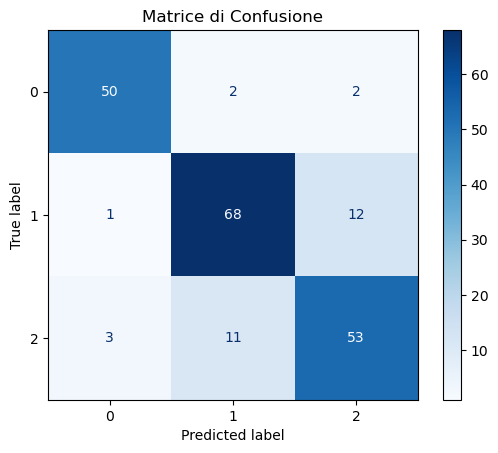

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Creazione della matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Visualizzazione della matrice di confusione
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap="Blues")
plt.title("Matrice di Confusione")
plt.show()


<h1> Gaussian Naive Bayes

Utilizziamo adesso il nostro classificatore GNB implementato nello step 1

In [53]:
parameters = functions.calcola_parametri(X_train, y_train)
predictions = functions.predict(X_test, parameters)  # Prevediamo con il modello Gaussian Naive Bayes
# Valutazione dell'accuratezza
accuracy = functions.calculate_accuracy(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.63


E visualizziamo la matrice di confusione

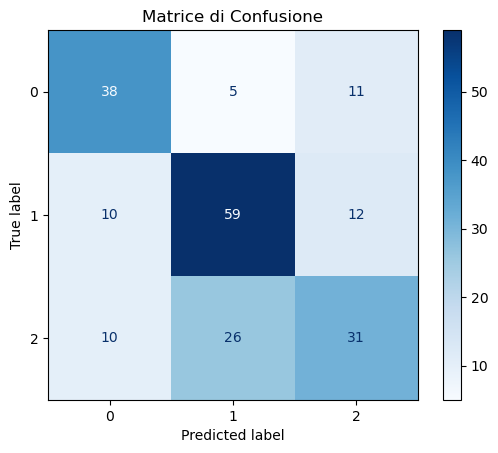

In [70]:

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap="Blues")
plt.title("Matrice di Confusione")
plt.show()

Valutiamo con la cross validation l'accuratezza media del GNB 

In [ ]:

X = data.iloc[:, :-1].values  # Carica tutte le feature (tutte le colonne tranne l'ultima)
y = data.iloc[:, -1].values   # Carica le etichette (l'ultima colonna)

# Esegui la cross-validation sul tuo modello Naive Bayes
accuracy = functions.cross_validate_naive_bayes(X, y, num_folds=5)
print(f'Accuratezza media con Gaussian Naive Bayes: {accuracy:.4f}')


Accuratezza media con Gaussian Naive Bayes: 0.5701


In [ ]:
#da mettere allo step 4

# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)
# rf_accuracy = rf.score(X_test, y_test)
# print(f'Random Forest Accuracy: {rf_accuracy:.2f}')